<a href="https://colab.research.google.com/github/JiHoonYoon00/mulcamp34/blob/main/%E1%84%80%E1%85%B5%E1%84%8E%E1%85%A9%E1%84%90%E1%85%A9%E1%86%BC%E1%84%80%E1%85%A8_240112.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

카이제곱검정은 모수검정?
- 모수검정 : 평균의 차이/ 분포의 차이(적합도 검정)
- 비모수검정 : 독립성검정

In [ ]:
!pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 4.3 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 3.5 MB/s eta 0:00:00a 0:00:01


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.formula.api as smf
import seaborn as sns
statsmodels.__version__

'0.14.1'

In [ ]:
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
model = smf.ols(formula = 'sepal_length ~ sepal_width', data = iris).fit() # y , x값


In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           sepal_length   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     2.074
Date:                Fri, 12 Jan 2024   Prob (F-statistic):              0.152
Time:                        13:23:37   Log-Likelihood:                -183.00
No. Observations:                 150   AIC:                             370.0
Df Residuals:                     148   BIC:                             376.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.5262      0.479     13.628      0.000       5.580       7.473
sepal_width    -0.2234      0.155     -1.440      0.152      -0.530       0.083
==============================================================================
Omnibus:                        4.389   Durbin-Watson:                   0.952
Prob(Omnibus):                  0.111   Jarque-Bera (JB):                4.237
Skew:                           0.360   Prob(JB):                        0.120
Kurtosis:                       2.600   Cond. No.                         24.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
intercept = model.params.Intercept # 절편
slope = model.params.sepal_width # 기울기

print(intercept,slope)


6.526222550894481 -0.2233610611298991


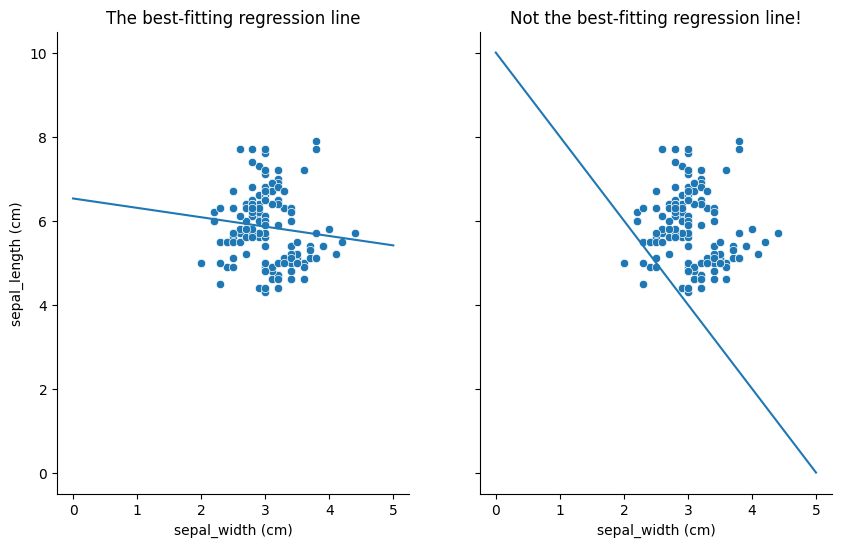

In [ ]:
# 독립변수가 종속변수에 영향을 주지 못한것(기울기 0에 가깝기 때문에 즉 x 가 y에게 미치는 영향)

fig, ax = plt.subplots(1, 2, figsize=(10, 6), sharey=True)
x = np.linspace(0,5)

sns.scatterplot(data = iris, x = 'sepal_width', y = 'sepal_length', ax = ax[0])
fig.axes[0].set_title("The best-fitting regression line")
fig.axes[0].set_xlabel("sepal_width (cm)")
fig.axes[0].set_ylabel("sepal_length (cm)")
fig.axes[0].plot(x,slope*x+intercept)

sns.scatterplot(data = iris, x = 'sepal_width', y = 'sepal_length', ax = ax[1])
fig.axes[1].set_title("Not the best-fitting regression line!")
fig.axes[1].set_xlabel("sepal_width (cm)")
fig.axes[1].set_ylabel("sepal_length (cm)")
fig.axes[1].plot(x,-2*x+10)

sns.despine()
plt.show()

#회기식은 y변수에 적합한 x변수를 찾는것 #적합한 p-value는 무엇? #

In [ ]:
!pip install pingouin

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 3.2 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 3.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 4.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 5.3 MB/s eta 0:00:00a 0:00:01
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7028 sha256=c88ab1cfa147fabc2ddfa3f9caa232bbb23b20d744624a8061b9c0ebe66bba31
  Stored in directory: /Users/yoonjihoon/Library/Caches/pip/wheels/3d/fe/b0/27a9892da57472e538c7452a721a9cf463cc03cf7379889266
Successfully built littleutils


In [ ]:
import pingouin as pg

mod1 = pg.linear_regression(iris['sepal_width'], iris['sepal_length'])  # x축 y축
mod1.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,6.53,0.48,13.63,0.00,0.01,0.01,5.58,7.47
1,sepal_width,-0.22,0.16,-1.44,0.15,0.01,0.01,-0.53,0.08


In [ ]:
#결정 계수 판단과 적합한 p-value

In [ ]:
#독립변수가 많으면 뭐가 더 중요한지 기울기를 보고 판단 하는게 아니라 상관계수를 보고 판단한다.

In [ ]:
predictors = ['sepal_width', 'petal_length']
outcome = 'sepal_length'

mod2 = pg.linear_regression(iris[predictors], iris[outcome])
mod2.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,2.25,0.25,9.07,0.0,0.84,0.84,1.76,2.74
1,sepal_width,0.60,0.07,8.59,0.0,0.84,0.84,0.46,0.73
2,petal_length,0.47,0.02,27.57,0.0,0.84,0.84,0.44,0.51


In [ ]:
iris.loc[:, ['sepal_length', 'sepal_width', 'petal_length']].rcorr()

/Users/yoonjihoon/anaconda3/envs/myenv/lib/python3.10/site-packages/pingouin/correlation.py:1111: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mat_upper = mat_upper.applymap(replace_pval)


,sepal_length,sepal_width,petal_length
sepal_length,-,,***
sepal_width,-0.118,-,***
petal_length,0.872,-0.428,-


In [ ]:
mod3 = pg.linear_regression(iris['petal_length'], iris['sepal_length'])
mod3.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,4.31,0.08,54.94,0.0,0.76,0.76,4.15,4.46
1,petal_length,0.41,0.02,21.65,0.0,0.76,0.76,0.37,0.45


In [ ]:
mod4 = pg.linear_regression(iris['sepal_length'], iris['sepal_length'])
mod4.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,-0.0,0.0,-3.238000e+01,0.0,1.0,1.0,-0.0,-0.0
1,sepal_length,1.0,0.0,1.347734e+17,0.0,1.0,1.0,1.0,1.0


### tip데이터 활용해서 회귀분석
- 종속변수 tip
- 독립변수 자유

In [ ]:
import seaborn as sns
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
mod = pg.linear_regression(tips['total_bill'], tips['tip'])  # x축 y축
mod.round(2)
#p벨류 낮음 - 관계있음, 결정계수0.45

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,0.92,0.16,5.76,0.0,0.46,0.45,0.61,1.23
1,total_bill,0.11,0.01,14.26,0.0,0.46,0.45,0.09,0.12


In [ ]:
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
model = smf.ols(formula = 'tip ~ day', data = tips).fit()
model.summary()
# 코드

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1.672
Date:                Fri, 12 Jan 2024   Prob (F-statistic):              0.174
Time:                        16:46:15   Log-Likelihood:                -422.43
No. Observations:                 244   AIC:                             852.9
Df Residuals:                     240   BIC:                             866.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7715      0.175     15.837      0.000       2.427       3.116
day[T.Fri]    -0.0367      0.361     -0.102      0.919      -0.748       0.675
day[T.Sat]     0.2217      0.229      0.968      0.334      -0.229       0.673
day[T.Sun]     0.4837      0.236      2.051      0.041       0.019       0.948
==============================================================================
Omnibus:                       82.801   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              238.276
Skew:                           1.492   Prob(JB):                     1.82e-52
Kurtosis:                       6.811   Cond. No.                         5.28
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""